<a href="https://colab.research.google.com/github/euleralencar/mineracao_dados_python/blob/main/aula%2001/Aula_01_gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Dados com Pandas

**By: Ronisson Lucas Calmon da Conceição**

Author, Researcher and Professor in Data Science and Statistics

PhD candidate at Federal University of Bahia (UFBA) and Data Science Consultant

[My Linkedin](https://www.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202/)

[My github](https://github.com/ronissonlucas)

Follow me !

##### **Agenda**
* Aspectos introdutórios
* Estrutura de Dados no Pandas
* Sumarizando Dados,Estatística Descritiva e Transformações
* Renomeando colunas
* Selecionando dados
* Ordenação
* Inserção de colunas
* Filtros
* Drop de linhas e colunas
* Funções úteis
* Apply, apply map e map
* IO
* GroupBy

In [ ]:
# install packages
!pip install pandas numpy geobr seaborn geopandas plotly

In [2]:
# imports
# data manipulation
import pandas as pd
import numpy as np
import geopandas as gpd

# data visualization
import geobr
import seaborn as sns
import matplotlib.pyplot as plt

### Aspectos introdutórios
#### O que é Data Science?

Para além da programação e das demais ferramentas, Ciência de Dados é um campo interdisciplinar e desta forma envolve a aplicação de outras disciplinas como Matemática e Estatística, com ênfase na análise de dados para possíveis tomadas de decisão.
Assim, o objetivo desta trilha é demonstrar os principais conceitos estatísticos a serem utilizados em Ciência de Dados. Não pretende ser um resumo exaustivo ou definitivo, visto a complexidade destas áreas.

<img src = 'https://abracd.org/wp-content/uploads/2019/04/diagrama-data-science.png'/>

#### Ecossitema do Python

##### Eixo base

1. NumPy

Biblioteca de manipulação de arrays multidimensionais de alta performance, possui diversas funções matemáticas e estatísticas.

2. Pandas

Principal biblioteca de manipulação e análise de dados. Possui diversos métodos para agrupar, filtrar, manipular, limpar e combinar dados de forma simples.

3. StatsModels

Módulo com diversas funções estatísticas.

4. SciPy

Biblioteca para computação científica, com funções de álgebra linear, cálculo, estatística, dentre outras.

##### Data Visualization

1. Matplotlib

2. Seaborn

3. Plotly

4. Altair

5. Bokeh

6. Pydot

7. Yellowbrick

##### Machine Learning e Deep Learning

1. Scikit-learn

2. TensorFlow

3. PyTorch

4. Keras


##### Scraping

1. Scrapy

2. Beautiful Soup

##### Processamento de Linguagem Natural

1. NLTK

2. SpaCy

3. Gensim

Há diversas outras bibliotecas e módulos dentro do ecossitema Pythônico. 

### Estrutura de Dados no Pandas
#### Series

O que é uma Series?
* array unidimensional (ou podemos entender essa estrutura como sendo uma coluna do Excel);
* ponto de partida para entender as estruras de dados do Pandas.

Usamos o construtor: `pandas.Series( data, index, dtype, copy)`.


* `data`: aceita formas variadas de inputs, como arrays NumPy (ndarray), listas, tuplas, constantes e dicionários.
* `index`: índice do ojbeto Series, deve ter o mesmo tamanho do array data, o valor default é np.arrange(n), caso nenhum array seja passado.
* `dtype`: informa o dtype dos dados, pode ser inferido.

In [3]:
# exemplo 1 (lista e tupla)
series = pd.Series([7, 8, 9, 10, 11])
series
# ou ainda: pd.Series((7, 8, 9, 10, 11))

0     7
1     8
2     9
3    10
4    11
dtype: int64

In [4]:
type(series)

pandas.core.series.Series

In [ ]:
dir(series)

In [6]:
# exemplo 2 (ndarray)
pd.Series(np.array(['f', 'h', 'i', 'j']), index = [1, 2, 3, 4])

1    f
2    h
3    i
4    j
dtype: object

In [7]:
# exemplo 3 (dicionário)
pd.Series({'a': 99, 'b': 12, 'c': 7, 'd': 56, 'e': 39})

a    99
b    12
c     7
d    56
e    39
dtype: int64

In [ ]:
# exemplo 4 (constante)
pd.Series(100, index = np.arange(1, 11))

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64

Vamos aprender a acessar elementos de uma Series.

In [ ]:
np.random.seed(7)
data = np.random.randint(low = 1, high =  100, size =  8)
index = ['a', 'b', 'c', 'd', 'e' , 'f', 'g', 'h']
series = pd.Series(data, index = index)

In [ ]:
# 5 primeiros elementos 
series.head()

a    48
b    69
c    26
d    68
e    84
dtype: int64

In [ ]:
# 5 últimos elementos 
series.tail()

d    68
e    84
f    24
g    93
h    58
dtype: int64

Veremos que para acessar elementos usaremos uma  sintaxe similar as listas e mesmo objetos ndarray.

In [ ]:
# primeiro elemento
series[0]

48

In [ ]:
# último elemento
series[-1:]

h    58
dtype: int64

In [ ]:
# 5 primeiros elementos
series[:5]

a    48
b    69
c    26
d    68
e    84
dtype: int64

In [ ]:
# pega os elementos entre as posições 1 e 4 (exclusive)
series[1:4]

b    69
c    26
d    68
dtype: int64

In [ ]:
# pega os dois últimos elementos
series[-2:]

g    93
h    58
dtype: int64

Vamos acessar os elementos pelo label.

In [ ]:
# pega o primeiro elemento
series['a']

48

In [ ]:
series.get('a')

48

In [ ]:
# pega elementos do rótulo 'a' até o 'd'
series['a':'d']

a    48
b    69
c    26
d    68
dtype: int64

In [ ]:
# múltiplos elementos
series[['a', 'c', 'f']]

a    48
c    26
f    24
dtype: int64

Agora podemos verificar alguns atributos do nosso objeto.

In [ ]:
# shape
# temos 8 linhas
series.shape

(8,)

In [ ]:
# índice
series.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

In [ ]:
# valores: retorna um objeto ndarray
series.values

array([48, 69, 26, 68, 84, 24, 93, 58])

In [ ]:
type(series.values)

numpy.ndarray

In [ ]:
# número de dimensões
series.ndim

1

Agora podemos aplicar estatística descritiva para entender melhor nossos dados, para tanto vamos criar outro objeto.

In [ ]:
notas = [7, 9, 8, 5]
alunos = ['Lucas', 'Laís', 'Tales', 'Rebeca']
series = pd.Series(notas, index = alunos, name = 'Notas Matemática')

In [ ]:
series

Lucas     7
Laís      9
Tales     8
Rebeca    5
Name: Notas Matemática, dtype: int64

In [ ]:
# média das notas
series.mean()

7.25

In [ ]:
# desvio padrão
series.std()

1.707825127659933

In [ ]:
# variância
series.var()

2.9166666666666665

In [ ]:
# mediana
series.median()

7.5

In [ ]:
# nota máxima
series.max()

9

In [ ]:
# aluno com nota máxima
series.idxmax()

'Laís'

In [ ]:
# nota mínima
series.min()

5

In [ ]:
# aluno com nota mínima
series.idxmin()

'Rebeca'

Vejamos agora algumas operações com Series, para tanto iremos criar duas séries.

In [ ]:
np.random.seed(8)
n = 5
notas_biologia = pd.Series(np.random.randint(1, 10, size = n))
notas_matematica = pd.Series(np.random.randint(1, 10, size = n))

In [ ]:
notas_biologia+notas_matematica

0     8
1    14
2     3
3    12
4    11
dtype: int64

In [ ]:
notas_biologia-notas_matematica

0    0
1   -4
2    1
3    0
4    7
dtype: int64

In [ ]:
notas_biologia/notas_matematica

0    1.000000
1    0.555556
2    2.000000
3    1.000000
4    4.500000
dtype: float64

In [ ]:
notas_biologia*notas_matematica

0    16
1    45
2     2
3    36
4    18
dtype: int64

In [ ]:
# média global
(notas_biologia+notas_matematica)/2

0    4.0
1    7.0
2    1.5
3    6.0
4    5.5
dtype: float64

In [ ]:
notas_biologia

0    4
1    5
2    2
3    6
4    9
dtype: int64

E se nossa tarefa fosse selecionar apenas os alunos com nota maior ou igual a 6?

In [ ]:
notas_biologia > 6

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [ ]:
notas_biologia != 6

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [ ]:
notas_biologia == 6

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [ ]:
# alunos com nota maior ou igual a 6
notas_biologia[notas_biologia >= 6]

3    6
4    9
dtype: int64

In [ ]:
# alunos com nota igual a 9
notas_biologia[notas_biologia == 9]

4    9
dtype: int64

In [ ]:
# alunos com nota diferente de 9
# ou: notas_biologia[notas_biologia != 9]
notas_biologia[~(notas_biologia == 9)]

0    4
1    5
2    2
3    6
dtype: int64

In [ ]:
# adicionando novos valores
notas_biologia[5] = 9
notas_biologia[6] = 9
notas_biologia[7] = 4

Agora vamos contar a frequência das notas de biologia:

In [ ]:
notas_biologia.value_counts()

9    3
4    2
6    1
5    1
2    1
dtype: int64

Observe que temos então 3 alunos com nota 9, 2 alunos com notas 4, e assim por diante. Podemos obter esta frequência em termos percentuais, passando `normalize = True`.

In [ ]:
notas_biologia.value_counts(normalize = True)*100

9    37.5
4    25.0
6    12.5
5    12.5
2    12.5
dtype: float64

Por fim, uma operação útil seria a concatenação de Series.

In [ ]:
pd.concat([notas_biologia, notas_matematica], axis = 0)

0    4
1    5
2    2
3    6
4    9
5    9
6    9
7    4
0    4
1    9
2    1
3    6
4    2
dtype: int64

In [ ]:
notas = pd.concat([notas_biologia, notas_matematica], axis = 1)

In [ ]:
notas.columns = ['Biologia', 'Matemática']

In [ ]:
notas.fillna(0, inplace = True)

In [ ]:
notas['Média'] = notas.mean(axis = 1)

In [ ]:
notas

,Biologia,Matemática,Média
0,4,4.0,4.0
1,5,9.0,7.0
2,2,1.0,1.5
3,6,6.0,6.0
4,9,2.0,5.5
5,9,0.0,4.5
6,9,0.0,4.5
7,4,0.0,2.0


Visualização de Dados com Series

In [ ]:
np.random.seed(9)
series = pd.Series(np.random.normal(80, 1.5, size = 50))

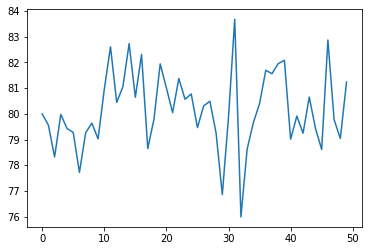

In [ ]:
# gráfico de linhas
series.plot();

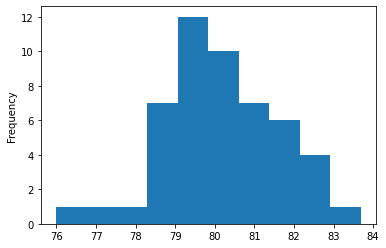

In [ ]:
# histograma
series.plot(kind = 'hist');

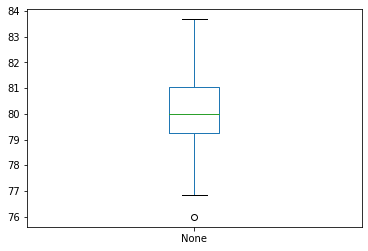

In [ ]:
# boxplot
series.plot(kind = 'box');

### DataFrame

##### Criando DataFrames: Exemplo 1

In [ ]:
nomes = ['Lucas', 'Gabriel', 'Laís', 'Neide', 'Tales', 'Rebeca']
notas_matematica = [7, 9, 10, 8, 5, 9]
notas_biologia = [10, 9, 7, 7, 5, 6]
data = {
        'Nome': nomes ,
        'Matemática': notas_matematica,
        'Biologia': notas_biologia
       }

df = pd.DataFrame(data)
df

,Nome,Matemática,Biologia
0,Lucas,7,10
1,Gabriel,9,9
2,Laís,10,7
3,Neide,8,7
4,Tales,5,5
5,Rebeca,9,6


##### Criando DataFrames: Exemplo 2

In [ ]:
np.random.seed(10)
# quantidade de observações
n = 100

escolaridade = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

cidades = ['São Paulo', 'Recife', 'Salvador', 'Salvador', 'Rio de Janeiro']

sexo = ['Masculino', 'Feminino']

# dicionário com dados
data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(18, 70, size = n),
    'Renda': np.random.randint(1_500, 10_000, size = n),
    'Sexo': np.random.choice(sexo, size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n),
    'Cidade': np.random.choice(cidades, size = n)
}

df = pd.DataFrame(data)

##### Inspeção de Dados

In [ ]:
# 5 primeiras linhas
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
# 5 últimas linhas
df.tail()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro
99,100,60,4265,Masculino,Ensino Fundamental,Salvador


In [ ]:
# quantidade de linhas e colunas
df.shape

(100, 6)

In [ ]:
# quantidade de linhas
len(df)

100

In [ ]:
# checa o tipo do objeto
type(df.shape)

tuple

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# linha x coluna
df.size

600

In [ ]:
# sumário do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            100 non-null    int64 
 1   Idade         100 non-null    int64 
 2   Renda         100 non-null    int64 
 3   Sexo          100 non-null    object
 4   Escolaridade  100 non-null    object
 5   Cidade        100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [ ]:
# índice do DataFrame
df.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
# colunas do DataFrame
df.columns

Index(['Id', 'Idade', 'Renda', 'Sexo', 'Escolaridade', 'Cidade'], dtype='object')

In [ ]:
# dtype de cada coluna
df.dtypes

Id               int64
Idade            int64
Renda            int64
Sexo            object
Escolaridade    object
Cidade          object
dtype: object

In [ ]:
# número de dimensões
df.ndim

2

In [ ]:
# Series: vetor unidimensional
type(df.Idade)

pandas.core.series.Series

In [ ]:
# sumário estatístico dos dados
df.describe()

,Id,Idade,Renda
count,100.000000,100.000000,100.000000
mean,50.500000,43.140000,5885.120000
std,29.011492,14.227602,2328.749998
min,1.000000,18.000000,1912.000000
25%,25.750000,31.000000,3858.500000
50%,50.500000,42.000000,5944.500000
75%,75.250000,54.000000,7961.250000
max,100.000000,69.000000,9978.000000


In [ ]:
# transposição do resultado do sumário estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Idade,100.0,43.14,14.227602,18.0,31.00,42.0,54.00,69.0
Renda,100.0,5885.12,2328.749998,1912.0,3858.50,5944.5,7961.25,9978.0


In [ ]:
# 'all': permite gerar um sumário descritivo para as colunas categóricas
df.describe(include = 'all')

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
count,100.000000,100.000000,100.000000,100,100,100
unique,NaN,NaN,NaN,2,3,4
top,NaN,NaN,NaN,Masculino,Ensino Médio,Salvador
freq,NaN,NaN,NaN,51,36,46
mean,50.500000,43.140000,5885.120000,NaN,NaN,NaN
std,29.011492,14.227602,2328.749998,NaN,NaN,NaN
min,1.000000,18.000000,1912.000000,NaN,NaN,NaN
25%,25.750000,31.000000,3858.500000,NaN,NaN,NaN
50%,50.500000,42.000000,5944.500000,NaN,NaN,NaN
75%,75.250000,54.000000,7961.250000,NaN,NaN,NaN


In [ ]:
# quantidade de observações não nulas por coluna
df.count()

Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64

### Sumarizando Dados e Estatística Descritiva

In [ ]:
# cria uma máscara a partir da qual iremos gerar algumas medidas estatísticas
df_mask = df[['Idade', 'Renda']]

In [ ]:
# quantidade de dados não nulo em cada coluna
df.count()

Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64

In [ ]:
# valor mínimo em cada coluna
df_mask.min()

Idade      18
Renda    1912
dtype: int64

In [ ]:
# índice do valor mínimo em cada coluna
df_mask.idxmin()

Idade     3
Renda    51
dtype: int64

In [ ]:
# índice do valor mínimo na coluna Idade
df_mask.Idade.idxmin()

3

In [ ]:
# valor máximo em cada coluna
df_mask.max()

Idade      69
Renda    9978
dtype: int64

In [ ]:
# índice do valor máximo em cada coluna
df_mask.idxmax()

Idade    17
Renda    20
dtype: int64

In [ ]:
# índice do valor máximo na coluna Idade
df_mask.Idade.idxmax()

17

In [ ]:
# média dos valores em cada coluna
df_mask.mean()

Idade      43.14
Renda    5885.12
dtype: float64

In [ ]:
# variância dos valores em cada coluna
df_mask.var()

Idade    2.024246e+02
Renda    5.423077e+06
dtype: float64

In [ ]:
# desvio padrão dos valores em cada coluna
df_mask.std()

Idade      14.227602
Renda    2328.749998
dtype: float64

In [ ]:
# desvio médio absoluto dos valores em cada coluna
df_mask.mad()

Idade      11.9340
Renda    1979.6328
dtype: float64

In [ ]:
# median dos valores em cada coluna
df_mask.median()

Idade      42.0
Renda    5944.5
dtype: float64

In [ ]:
# moda dos valores em cada coluna
df.Cidade.mode()

0    Salvador
dtype: object

In [ ]:
# soma da renda de todos os clientes
df.Renda.sum()

588512

In [ ]:
# soma cumulativa da renda
df.Renda.cumsum()

0       4297
1      12254
2      18597
3      22963
4      27068
       ...  
95    569628
96    574696
97    581872
98    584247
99    588512
Name: Renda, Length: 100, dtype: int64

In [ ]:
# quartis de renda (Q1 e Q3)
df.Renda.quantile([0.25, 0.75])

0.25    3858.50
0.75    7961.25
Name: Renda, dtype: float64

In [ ]:
# covariância: associação entre variáveis quantitativas
df_mask.cov()

,Idade,Renda
Idade,202.424646,-7.693806e+02
Renda,-769.380606,5.423077e+06


In [ ]:
# correlação: associação entre variáveis quantitativas
# varia de -1 a 1
# valores próximos de 1: correlação alta positiva
# valores próximos de -1: correlação alta negativa
# valores próximos de 0: ausência de correlação
df_mask.corr()

,Idade,Renda
Idade,1.000000,-0.023221
Renda,-0.023221,1.000000


In [ ]:
# url 
link = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
# leitura do dado
desemprego_data = pd.read_csv(link)

In [ ]:
# veremos melhor a função pivot_table mais adiante
desemprego_total = desemprego_data.pivot_table(
    index = 'Date',
    columns = 'state',
    values = 'UnemploymentRate'
)

In [ ]:
desemprego_total.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [ ]:
# filtra os dados para estados selecionados
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
desemprego = desemprego_total[states]

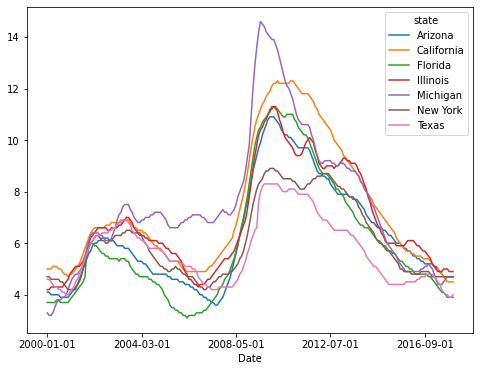

In [ ]:
desemprego.plot(figsize = (8, 6))

In [ ]:
desemprego.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
      dtype='object', name='Date', length=216)

In [ ]:
# dados a partir de 2010
desemprego.loc['2010-1-1':]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2010-10-01,10.1,12.3,11.0,9.8,11.8,8.5,8.1
2010-11-01,10.0,12.3,11.0,9.7,11.6,8.4,8.1
2010-12-01,9.9,12.2,10.8,9.5,11.3,8.4,8.1
2011-01-01,9.8,12.1,10.7,9.4,11.0,8.3,8.0
2011-02-01,9.7,12.0,10.5,9.4,10.8,8.2,7.9
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [ ]:
# taxa de desemprego média para cada estado
desemprego.mean()

state
Arizona       6.301389
California    7.299074
Florida       6.048611
Illinois      6.822685
Michigan      7.492593
New York      6.102315
Texas         5.695370
dtype: float64

In [ ]:
# podemos alterar o axis
# então estaríamos calculando a média mensal entre os estados selecionados
desemprego.mean(axis = 1).head()

Date
2000-01-01    4.228571
2000-02-01    4.214286
2000-03-01    4.185714
2000-04-01    4.200000
2000-05-01    4.214286
dtype: float64

Vamos escrever nossa própria métrica de agregação.

In [ ]:
def high_or_low(data):
    
    if data.mean() < 6.5:
        return 'Low'
    return 'High'

In [ ]:
desemprego.agg(high_or_low)

state
Arizona        Low
California    High
Florida        Low
Illinois      High
Michigan      High
New York       Low
Texas          Low
dtype: object

Podemos escrever a função de agregação de outro modo:

In [ ]:
def high_or_low(data):
    
    if data.mean() < 6.5:
        result = 'Low'
        return result
    else:
        result = 'High'
        return result

In [ ]:
desemprego.agg(high_or_low, axis = 1).head()

Date
2000-01-01    Low
2000-02-01    Low
2000-03-01    Low
2000-04-01    Low
2000-05-01    Low
dtype: object

Podemos aplicar mais de uma métrica de agregação por vez:

In [ ]:
desemprego.agg([min, high_or_low,max])

,Arizona,California,Florida,Illinois,Michigan,New York,Texas
min,3.6,4.5,3.1,4.2,3.2,4.2,3.9
high_or_low,Low,High,Low,High,High,Low,Low
max,10.9,12.3,11.3,11.3,14.6,8.9,8.3


In [ ]:
# podemos alterar o axis
# neste caso obtemos informações sobre a taxa de desemprego mensal dos estados selecionados
desemprego.agg([min,high_or_low,max],axis = 1).head()

,min,high_or_low,max
2000-01-01,3.3,Low,5
2000-02-01,3.2,Low,5
2000-03-01,3.2,Low,5
2000-04-01,3.3,Low,5.1
2000-05-01,3.5,Low,5.1


In [ ]:
desemprego.pct_change().fillna('-')

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-,-,-,-,-,-,-
2000-02-01,0,0,0,0,-0.030303,0,0
2000-03-01,-0.0243902,0,0,0.0238095,0,-0.0212766,-0.0217391
2000-04-01,0,0.02,0,0,0.03125,0,-0.0222222
2000-05-01,0,0,0,0,0.0606061,0,-0.0227273
...,...,...,...,...,...,...,...
2017-08-01,0,-0.0212766,-0.0243902,0,0.0222222,0,-0.0243902
2017-09-01,0,-0.0217391,-0.025,0,0.0217391,0,0
2017-10-01,0,0,0,-0.02,0,0,-0.025


### Renomeando colunas

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
# coluna do data frame
df.columns

Index(['Id', 'Idade', 'Renda', 'Sexo', 'Escolaridade', 'Cidade'], dtype='object')

In [ ]:
# cria uma cópia dos dados
data = df.copy()

In [ ]:
# renomeia a coluna 'Id' para 'id'
data.rename(columns = {'Id': 'id'}).head()

,id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
# renomeia outras colunas
new_cols = {'Id': 'id',
            'Renda': 'renda_cliente',
            'Escolaridade': 'grau_escolaridade'}

data.rename(columns = new_cols)

,id,Idade,renda_cliente,Sexo,grau_escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro


In [ ]:
# note que criamos apenas uma view
data.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
data_ = data.rename(columns = new_cols)

In [ ]:
data_.head()

,id,Idade,renda_cliente,Sexo,grau_escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
data.rename(columns = new_cols, inplace = True)

In [ ]:
data.head()

,id,Idade,renda_cliente,Sexo,grau_escolaridade,Cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife


In [ ]:
# aplica o método .lower() em cada coluna do DataFrame via função lambda
data.rename(columns = lambda column:column.lower())

,id,idade,renda_cliente,sexo,grau_escolaridade,cidade
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro


In [ ]:
# aplica o método .upper() em cada coluna do DataFrame via função lambda
data.rename(columns = lambda column:column.upper())

,ID,IDADE,RENDA_CLIENTE,SEXO,GRAU_ESCOLARIDADE,CIDADE
0,1,27,4297,Masculino,Ensino Médio,São Paulo
1,2,54,7957,Feminino,Ensino Superior,Recife
2,3,33,6343,Feminino,Ensino Fundamental,Salvador
3,4,18,4366,Feminino,Ensino Fundamental,Salvador
4,5,67,4105,Feminino,Ensino Fundamental,Recife
...,...,...,...,...,...,...
95,96,67,2958,Masculino,Ensino Médio,Recife
96,97,33,5068,Masculino,Ensino Superior,Recife
97,98,62,7176,Masculino,Ensino Médio,Salvador
98,99,58,2375,Feminino,Ensino Superior,Rio de Janeiro


### Selecionando dados

In [ ]:
np.random.seed(7)
sample = pd.DataFrame({'A': np.random.randint(1, 100, 5),
                       'B': np.random.randint(1, 1_000, 5),
                       'C': np.random.randint(500, 2_000, 5)
                      },
                     index = ['a', 'b', 'c', 'd', 'e'])

In [ ]:
sample

,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054
e,84,399,1230


.iloc[]: seleciona valores pelo índice.

Sintaxe: `data_frame.iloc[linha, coluna]`

In [ ]:
# todas as linhas da coluna de posição 0
sample.iloc[:, 0]

a    48
b    69
c    26
d    68
e    84
Name: A, dtype: int64

In [ ]:
# valores entre 'a' e 'd'
sample.iloc[:4]

,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054


In [ ]:
# valores das linhas 'a' até 'c', para a coluna de posição 0
sample.iloc[:3, 0]

a    48
b    69
c    26
Name: A, dtype: int64

In [ ]:
# valores das linhas 'b' até 'd', para a colunas de posição 0 e 1
sample.iloc[1:4, [0, 1]]

,A,B
b,69,616
c,26,349
d,68,186


In [ ]:
# valores a partir da coluna 'c', colunas de posição [0 e 2]
sample.iloc[2:, [0, 2]]

,A,C
c,26,866
d,68,1054
e,84,1230


.loc[]: seleciona valores pelo label.

Sintaxe: `data_frame.loc[linha, coluna]`

In [ ]:
# todas as linhas da coluna A
sample.loc[:,'A']

a    48
b    69
c    26
d    68
e    84
Name: A, dtype: int64

In [ ]:
# valores entre 'a' e 'd'
sample.loc['a':'d', :]

,A,B,C
a,48,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054


In [ ]:
# valores das linhas 'a' até 'c', para a coluna A
sample.loc['a':'c', 'A']

a    48
b    69
c    26
Name: A, dtype: int64

In [ ]:
# valores das linhas 'b' até 'd', para a colunas A e B
sample.loc['b':'d', ['A', 'B']]

,A,B
b,69,616
c,26,349
d,68,186


In [ ]:
# valores a partir da coluna 'c', colunas de posição [0 e 2]
sample.loc['c':, ['A', 'C']]

,A,C
c,26,866
d,68,1054
e,84,1230


In [ ]:
# seleciona todas as colunas da última linha
sample.iloc[-1:, ]

,A,B,C
e,84,399,1230


In [ ]:
# seleciona todas as colunas das duas últimas linhas
sample.iloc[-2:, ]

,A,B,C
d,68,186,1054
e,84,399,1230


In [ ]:
# todos os valores da última coluna
sample.iloc[:, -1]

a    1035
b     845
c     866
d    1054
e    1230
Name: C, dtype: int64

Selecionando apenas um valor:

In [ ]:
sample.at['a', 'A']

48

In [ ]:
# altera o valor
sample.at['a', 'A'] = 50

In [ ]:
sample

,A,B,C
a,50,920,1035
b,69,616,845
c,26,349,866
d,68,186,1054
e,84,399,1230


In [ ]:
sample.iat[0, 0]

50

In [ ]:
sample.iat[3, 1]

186

### Ordenação

In [ ]:
np.random.seed(10)
n = 50_000

escolaridade = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(18, 70, size = n),
    'Renda': np.random.randint(1_500, 10_000, size = n),
    'Sexo': np.random.choice(['Masculino', 'Feminino'], size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n)
}

df = pd.DataFrame(data)

In [ ]:
# ordena o data frame pelo nível de renda
df.sort_values(by = 'Renda')

,Id,Idade,Renda,Sexo,Escolaridade
20624,20625,32,1500,Masculino,Ensino Superior
33316,33317,46,1500,Feminino,Ensino Médio
8074,8075,39,1500,Masculino,Ensino Superior
23165,23166,36,1500,Masculino,Ensino Médio
30444,30445,32,1500,Feminino,Ensino Fundamental
...,...,...,...,...,...
21093,21094,65,9999,Masculino,Ensino Superior
8381,8382,68,9999,Feminino,Ensino Médio
38187,38188,23,9999,Masculino,Ensino Superior
41288,41289,61,9999,Masculino,Ensino Fundamental


In [ ]:
# ordena pelo nível de renda e idade
df.sort_values(by = ['Renda', 'Idade'])

,Id,Idade,Renda,Sexo,Escolaridade
36064,36065,22,1500,Feminino,Ensino Médio
20624,20625,32,1500,Masculino,Ensino Superior
30444,30445,32,1500,Feminino,Ensino Fundamental
23165,23166,36,1500,Masculino,Ensino Médio
20935,20936,38,1500,Masculino,Ensino Fundamental
...,...,...,...,...,...
38187,38188,23,9999,Masculino,Ensino Superior
41288,41289,61,9999,Masculino,Ensino Fundamental
21093,21094,65,9999,Masculino,Ensino Superior
1481,1482,68,9999,Masculino,Ensino Médio


In [ ]:
# ordena os dados pelo nível de escolaridade e sexo
df.sort_values(by = ['Escolaridade', 'Sexo'])

,Id,Idade,Renda,Sexo,Escolaridade
0,1,27,2554,Feminino,Ensino Fundamental
11,12,26,4193,Feminino,Ensino Fundamental
22,23,42,7966,Feminino,Ensino Fundamental
24,25,51,8772,Feminino,Ensino Fundamental
26,27,54,1599,Feminino,Ensino Fundamental
...,...,...,...,...,...
49974,49975,43,8550,Masculino,Ensino Superior
49979,49980,59,9848,Masculino,Ensino Superior
49981,49982,38,7913,Masculino,Ensino Superior
49989,49990,69,5049,Masculino,Ensino Superior


In [ ]:
# valores únicos da coluna Escolaridade
df.Escolaridade.unique()

array(['Ensino Fundamental', 'Ensino Superior', 'Ensino Médio'],
      dtype=object)

In [ ]:
# mapeamento dos valores da coluna escolaridade
rank_escolaridade = {
    'Ensino Fundamental': 'A',
    'Ensino Médio': 'B',
    'Ensino Superior': 'C'
}

In [ ]:
# mapeamento dos valores da coluna de Escolaridade ordenados em ordem alfabética
df.Escolaridade.map(rank_escolaridade).sort_values()

0        A
14924    A
35084    A
14921    A
14920    A
        ..
12161    C
12163    C
37862    C
12158    C
49999    C
Name: Escolaridade, Length: 50000, dtype: object

In [ ]:
rank_escolaridade_num = {
    'Ensino Fundamental': 1,
    'Ensino Médio': 2,
    'Ensino Superior': 3
}

In [ ]:
# mapeamento dos valores da coluna de Escolaridade ordenados
df.Escolaridade.map(rank_escolaridade_num).sort_values()

0        1
14924    1
35084    1
14921    1
14920    1
        ..
12161    3
12163    3
37862    3
12158    3
49999    3
Name: Escolaridade, Length: 50000, dtype: int64

In [ ]:
# ordena os dados a partir das colunas Renda e Escolaridade
df.sort_values(by = ['Renda', 'Escolaridade']).reset_index()

,index,Id,Idade,Renda,Sexo,Escolaridade
0,20935,20936,38,1500,Masculino,Ensino Fundamental
1,30444,30445,32,1500,Feminino,Ensino Fundamental
2,23165,23166,36,1500,Masculino,Ensino Médio
3,33316,33317,46,1500,Feminino,Ensino Médio
4,36064,36065,22,1500,Feminino,Ensino Médio
...,...,...,...,...,...,...
49995,41288,41289,61,9999,Masculino,Ensino Fundamental
49996,1481,1482,68,9999,Masculino,Ensino Médio
49997,8381,8382,68,9999,Feminino,Ensino Médio
49998,21093,21094,65,9999,Masculino,Ensino Superior


In [ ]:
# ordena os dados a partir das colunas Renda e Escolaridade
df.sort_values(by = ['Renda', 'Escolaridade']).reset_index(drop = True)

,Id,Idade,Renda,Sexo,Escolaridade
0,20936,38,1500,Masculino,Ensino Fundamental
1,30445,32,1500,Feminino,Ensino Fundamental
2,23166,36,1500,Masculino,Ensino Médio
3,33317,46,1500,Feminino,Ensino Médio
4,36065,22,1500,Feminino,Ensino Médio
...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental
49996,1482,68,9999,Masculino,Ensino Médio
49997,8382,68,9999,Feminino,Ensino Médio
49998,21094,65,9999,Masculino,Ensino Superior


In [ ]:
# ordena os dados a partir das colunas Renda e Escolaridade
df.sort_values(by = ['Renda', 'Escolaridade']).reset_index().drop(columns = ['index'])

,Id,Idade,Renda,Sexo,Escolaridade
0,20936,38,1500,Masculino,Ensino Fundamental
1,30445,32,1500,Feminino,Ensino Fundamental
2,23166,36,1500,Masculino,Ensino Médio
3,33317,46,1500,Feminino,Ensino Médio
4,36065,22,1500,Feminino,Ensino Médio
...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental
49996,1482,68,9999,Masculino,Ensino Médio
49997,8382,68,9999,Feminino,Ensino Médio
49998,21094,65,9999,Masculino,Ensino Superior


In [ ]:
# ordena os dados a partir das colunas Renda, Escolaridade e Sexo
# note que setamos inplace = True
df.sort_values(by = ['Renda', 'Escolaridade', 'Sexo'], inplace = True)

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade
30444,30445,32,1500,Feminino,Ensino Fundamental
20935,20936,38,1500,Masculino,Ensino Fundamental
33316,33317,46,1500,Feminino,Ensino Médio
36064,36065,22,1500,Feminino,Ensino Médio
23165,23166,36,1500,Masculino,Ensino Médio


In [ ]:
# reset do índice
df.reset_index(drop = True, inplace = True)

### Inserção de colunas

In [ ]:
np.random.seed(7)
ativos = pd.Series(np.random.normal(3_000, 1000, size = n)).round(2)

In [ ]:
# cria coluna de ativos
df['ativo'] = ativos

In [ ]:
# cria coluna de renda total
df['renda_total'] = df['Renda']+df['ativo']

In [ ]:
# renda média total dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean()

Renda    5746.135880
ativo    2995.777078
dtype: float64

In [ ]:
# renda média dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

0        3095.265
1        2017.030
2        2266.410
3        2453.760
4        1855.540
           ...   
49995    5680.580
49996    6675.700
49997    6622.955
49998    6646.110
49999    6517.720
Length: 50000, dtype: float64

In [ ]:
# outra forma de calcular a renda média dos indivíduos
((df['Renda']+df['ativo'])/2)

0        3095.265
1        2017.030
2        2266.410
3        2453.760
4        1855.540
           ...   
49995    5680.580
49996    6675.700
49997    6622.955
49998    6646.110
49999    6517.720
Length: 50000, dtype: float64

In [ ]:
# renda média (ativos e renda)
renda_media = df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

In [ ]:
renda_media

0        3095.265
1        2017.030
2        2266.410
3        2453.760
4        1855.540
           ...   
49995    5680.580
49996    6675.700
49997    6622.955
49998    6646.110
49999    6517.720
Length: 50000, dtype: float64

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,2211.08,3711.08


In [ ]:
# posição da coluna 'ativo'
posicao = df.columns.to_list().index('ativo')

In [ ]:
# insere a coluna renda_media na posição da coluna 'ativo'
df.insert(posicao, 'renda_média', renda_media )

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


### Filtros

Nesta seção aprenderemos a fazer filtro com os dados. Por exemplo, como filtrar os dados a partir de uma determianda categorica ou de um conjunto de condições?

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
# condição simples: filtra os dados a partir do sexo Feminino
df[df.Sexo == 'Feminino']

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
7,34019,18,1501,Feminino,Ensino Fundamental,1373.140,1245.28,2746.28
11,31782,32,1502,Feminino,Ensino Fundamental,2165.225,2828.45,4330.45
...,...,...,...,...,...,...,...,...
49984,32072,62,9997,Feminino,Ensino Médio,5753.355,1509.71,11506.71
49987,49520,28,9997,Feminino,Ensino Superior,7333.765,4670.53,14667.53
49988,43974,66,9998,Feminino,Ensino Fundamental,6788.305,3578.61,13576.61
49991,27833,49,9998,Feminino,Ensino Médio,6316.275,2634.55,12632.55


In [ ]:
# shape do filtro
df[df.Sexo == 'Feminino'].shape[0]

24980

In [ ]:
# condição simples: filtra os dados a partir do sexo Feminino
df.query('Sexo == "Feminino"')

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
7,34019,18,1501,Feminino,Ensino Fundamental,1373.140,1245.28,2746.28
11,31782,32,1502,Feminino,Ensino Fundamental,2165.225,2828.45,4330.45
...,...,...,...,...,...,...,...,...
49984,32072,62,9997,Feminino,Ensino Médio,5753.355,1509.71,11506.71
49987,49520,28,9997,Feminino,Ensino Superior,7333.765,4670.53,14667.53
49988,43974,66,9998,Feminino,Ensino Fundamental,6788.305,3578.61,13576.61
49991,27833,49,9998,Feminino,Ensino Médio,6316.275,2634.55,12632.55


In [ ]:
df.query("Sexo == 'Feminino'").shape[0]

24980

In [ ]:
#SyntaxError: invalid syntax: df.query("Sexo == "Feminino"")

In [ ]:
# condição simples: filtra os dados a partir do sexo Feminino
df.loc[df.Sexo == 'Feminino'].shape[0]

24980

In [ ]:
# condição 1: sexo feminino
# condição 2: escolaridade ensino superior
# AND: &
df[(df.Sexo == 'Feminino') & (df.Escolaridade == 'Ensino Superior')]

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
25,13589,55,1503,Feminino,Ensino Superior,1526.160,1549.32,3052.32
43,17597,23,1506,Feminino,Ensino Superior,1876.580,2247.16,3753.16
47,23108,60,1507,Feminino,Ensino Superior,3377.300,5247.60,6754.60
48,26873,56,1507,Feminino,Ensino Superior,2388.205,3269.41,4776.41
49,32228,59,1507,Feminino,Ensino Superior,1991.200,2475.40,3982.40
...,...,...,...,...,...,...,...,...
49966,1319,63,9994,Feminino,Ensino Superior,6413.235,2832.47,12826.47
49967,20501,56,9994,Feminino,Ensino Superior,6234.720,2475.44,12469.44
49968,25285,62,9994,Feminino,Ensino Superior,5919.225,1844.45,11838.45
49978,19654,43,9996,Feminino,Ensino Superior,6707.150,3418.30,13414.30


In [ ]:
df[(df.Sexo == 'Feminino') & (df.Escolaridade == 'Ensino Superior')].shape

(8358, 8)

In [ ]:
df.query("(Sexo == 'Feminino') & (Escolaridade == 'Ensino Superior')")

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
25,13589,55,1503,Feminino,Ensino Superior,1526.160,1549.32,3052.32
43,17597,23,1506,Feminino,Ensino Superior,1876.580,2247.16,3753.16
47,23108,60,1507,Feminino,Ensino Superior,3377.300,5247.60,6754.60
48,26873,56,1507,Feminino,Ensino Superior,2388.205,3269.41,4776.41
49,32228,59,1507,Feminino,Ensino Superior,1991.200,2475.40,3982.40
...,...,...,...,...,...,...,...,...
49966,1319,63,9994,Feminino,Ensino Superior,6413.235,2832.47,12826.47
49967,20501,56,9994,Feminino,Ensino Superior,6234.720,2475.44,12469.44
49968,25285,62,9994,Feminino,Ensino Superior,5919.225,1844.45,11838.45
49978,19654,43,9996,Feminino,Ensino Superior,6707.150,3418.30,13414.30


In [ ]:
df.query("(Sexo == 'Feminino') & (Escolaridade == 'Ensino Superior')").shape

(8358, 8)

In [ ]:
df.loc[(df.Sexo == 'Feminino') & (df.Escolaridade == 'Ensino Superior')].shape

(8358, 8)

In [ ]:
# condição 1: sexo masculino
# condição 2: renda>= 7_500

In [ ]:
df[(df.Sexo == 'Masculino') & (df.Renda >= 7_500)]

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
35411,20009,56,7500,Masculino,Ensino Fundamental,5340.385,3180.77,10680.77
35412,23973,54,7500,Masculino,Ensino Fundamental,5717.215,3934.43,11434.43
35413,41461,68,7500,Masculino,Ensino Fundamental,6166.995,4833.99,12333.99
35419,19716,54,7501,Masculino,Ensino Fundamental,4961.875,2422.75,9923.75
35421,11360,23,7502,Masculino,Ensino Médio,4920.425,2338.85,9840.85
...,...,...,...,...,...,...,...,...
49994,23061,39,9998,Masculino,Ensino Superior,6531.400,3064.80,13062.80
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
df[(df.Sexo == 'Masculino') & (df.Renda >= 7_500)].shape

(7241, 8)

In [ ]:
df.query('(Sexo == "Masculino") & (Renda >= 7_500)').shape

(7241, 8)

In [ ]:
df.loc[(df.Sexo == 'Masculino') & (df.Renda >= 7_500)].shape

(7241, 8)

In [ ]:
# condição 1: escolaridade Ensino Fundamental
# condição 2: escolaridade Ensino Médio
# OR: |
df[(df.Escolaridade == 'Ensino Fundamental') | (df.Escolaridade == 'Ensino Médio')]

,Id,Idade,Renda,Sexo,Escolaridade,renda_média,ativo,renda_total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...,...,...,...
49991,27833,49,9998,Feminino,Ensino Médio,6316.275,2634.55,12632.55
49992,45330,60,9998,Masculino,Ensino Médio,6367.150,2736.30,12734.30
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40


In [ ]:
df[(df.Escolaridade == 'Ensino Fundamental') | (df.Escolaridade == 'Ensino Médio')].shape

(33322, 8)

In [ ]:
df.query('(Escolaridade == "Ensino Fundamental") | (Escolaridade == "Ensino Médio")').shape

(33322, 8)

In [ ]:
df.loc[(df.Escolaridade == 'Ensino Fundamental') | (df.Escolaridade == 'Ensino Médio')].shape

(33322, 8)

In [ ]:
df[(df.Escolaridade == 'Ensino Fundamental') | (df.Escolaridade == 'Ensino Médio')]['Escolaridade'].unique()

array(['Ensino Fundamental', 'Ensino Médio'], dtype=object)

In [ ]:
# condição 1: renda>=8_000
# condição 2: idade>=50
# condição 3: feminino

df[(df.Renda>=8_000) & (df.Idade>=50) & (df.Sexo == 'Feminino')]\
.sort_values(by = ['Idade', 'Renda'])\
.reset_index(drop = True)\
.drop(columns = ['Id'])[['Renda', 'Idade']]\
.query('Idade >= 60')

,Renda,Idade
1121,8014,60
1122,8020,60
1123,8042,60
1124,8092,60
1125,8133,60
...,...,...
2245,9845,69
2246,9933,69
2247,9961,69
2248,9970,69


In [ ]:
df[(df.Renda>=8_000) & (df.Idade>=50) & (df.Sexo == 'Feminino')].shape

(2250, 8)

In [ ]:
df.query('(Renda >= 8_000) & (Idade >= 50) & (Sexo == "Feminino")').shape

(2250, 8)

In [ ]:
df.loc[(df.Renda>=8_000) & (df.Idade>=50) & (df.Sexo == 'Feminino')].shape

(2250, 8)

In [ ]:
df.rename(columns = {'renda_média': 'renda média'}, inplace = True)

In [ ]:
df.rename(columns = {'renda_total': 'renda total'}, inplace = True)

In [ ]:
df.query('`renda média` >= 7_000')

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
37924,48574,62,7928,Masculino,Ensino Superior,7020.680,6113.36,14041.36
38249,14292,19,7979,Masculino,Ensino Médio,7353.345,6727.69,14706.69
38554,28234,52,8031,Feminino,Ensino Superior,7042.605,6054.21,14085.21
38918,30427,19,8092,Masculino,Ensino Fundamental,7159.225,6226.45,14318.45
40270,45692,22,8322,Feminino,Ensino Fundamental,7045.245,5768.49,14090.49
...,...,...,...,...,...,...,...,...
49961,38978,23,9993,Feminino,Ensino Médio,7109.740,4226.48,14219.48
49969,24580,68,9994,Masculino,Ensino Superior,7486.550,4979.10,14973.10
49971,43924,36,9995,Feminino,Ensino Fundamental,7197.120,4399.24,14394.24
49981,1130,65,9997,Feminino,Ensino Fundamental,7227.480,4457.96,14454.96


In [ ]:
df.query('(`renda média` >= 5_000) & (`renda total` >= 8_000)')

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
16106,29956,35,4235,Masculino,Ensino Superior,5060.745,5886.49,10121.49
16279,49344,50,4266,Masculino,Ensino Superior,5558.875,6851.75,11117.75
16953,27792,35,4383,Masculino,Ensino Fundamental,5078.015,5773.03,10156.03
17073,6005,39,4403,Masculino,Ensino Fundamental,5179.070,5955.14,10358.14
17278,27007,21,4438,Masculino,Ensino Fundamental,5355.765,6273.53,10711.53
...,...,...,...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# nega a proposição
~(df.Sexo == 'Feminino')

0        False
1         True
2        False
3        False
4         True
         ...  
49995     True
49996    False
49997     True
49998     True
49999     True
Name: Sexo, Length: 50000, dtype: bool

In [ ]:
# nega a proposição, pega informações apenas para clientes do gênero masculino
df.loc[~(df.Sexo == 'Feminino')]

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
5,8075,39,1500,Masculino,Ensino Superior,2251.035,3002.07,4502.07
6,20625,32,1500,Masculino,Ensino Superior,2249.555,2999.11,4499.11
8,2903,18,1501,Masculino,Ensino Médio,2759.330,4017.66,5518.66
...,...,...,...,...,...,...,...,...
49994,23061,39,9998,Masculino,Ensino Superior,6531.400,3064.80,13062.80
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# outro exemplo de negação
# pega todos os clientes cuja a escolaridade não seja Ensino Superior
df.loc[~(df.Escolaridade == 'Ensino Superior')]

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...,...,...,...
49991,27833,49,9998,Feminino,Ensino Médio,6316.275,2634.55,12632.55
49992,45330,60,9998,Masculino,Ensino Médio,6367.150,2736.30,12734.30
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40


In [ ]:
# pega apenas os clientes com escolaridade igual a Ensino Superior
df.loc[df.Escolaridade.isin(['Ensino Superior'])]

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
5,8075,39,1500,Masculino,Ensino Superior,2251.035,3002.07,4502.07
6,20625,32,1500,Masculino,Ensino Superior,2249.555,2999.11,4499.11
15,3923,18,1502,Masculino,Ensino Superior,1524.380,1546.76,3048.76
16,47781,27,1502,Masculino,Ensino Superior,2528.290,3554.58,5056.58
25,13589,55,1503,Feminino,Ensino Superior,1526.160,1549.32,3052.32
...,...,...,...,...,...,...,...,...
49987,49520,28,9997,Feminino,Ensino Superior,7333.765,4670.53,14667.53
49993,10924,35,9998,Masculino,Ensino Superior,6487.420,2976.84,12974.84
49994,23061,39,9998,Masculino,Ensino Superior,6531.400,3064.80,13062.80
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# nega a condição, pega clientes cuja escolaridade não seja Ensino Superior
df.loc[~(df.Escolaridade.isin(['Ensino Superior']))]

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...,...,...,...
49991,27833,49,9998,Feminino,Ensino Médio,6316.275,2634.55,12632.55
49992,45330,60,9998,Masculino,Ensino Médio,6367.150,2736.30,12734.30
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40


In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
# pega apenas os clientes cuja a escolaridade seja diferente de Ensino Médio
df.query("Escolaridade != 'Ensino Médio'")['Escolaridade'].unique()

array(['Ensino Fundamental', 'Ensino Superior'], dtype=object)

In [ ]:
# verifica se Ensino Médio está contido no array com valores únicos da nossa consulta
'Ensino Médio' in df.query("Escolaridade != 'Ensino Médio'")['Escolaridade'].unique()

False

### Drop de linhas e colunas

In [ ]:
# cópia dos dados
data = df.copy()

In [ ]:
# remove as colunas Id e Escolaridade
data.drop(columns = ['Id', 'Escolaridade'])

,Idade,Renda,Sexo,renda média,ativo,renda total
0,32,1500,Feminino,3095.265,4690.53,6190.53
1,38,1500,Masculino,2017.030,2534.06,4034.06
2,46,1500,Feminino,2266.410,3032.82,4532.82
3,22,1500,Feminino,2453.760,3407.52,4907.52
4,36,1500,Masculino,1855.540,2211.08,3711.08
...,...,...,...,...,...,...
49995,61,9999,Masculino,5680.580,1362.16,11361.16
49996,68,9999,Feminino,6675.700,3352.40,13351.40
49997,68,9999,Masculino,6622.955,3246.91,13245.91
49998,65,9999,Masculino,6646.110,3293.22,13292.22


In [ ]:
# remove a coluna Id, com inplace = True
data.drop(columns = ['Id'], inplace = True)

In [ ]:
data.head()

,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
# índice das linhas a partir da condição construída
df.query('Escolaridade == "Ensino Fundamental"').index

Int64Index([    0,     1,     7,    11,    12,    17,    18,    19,    20,
               21,
            ...
            49970, 49971, 49972, 49976, 49981, 49982, 49988, 49989, 49990,
            49995],
           dtype='int64', length=16665)

In [ ]:
# índice das linhas a serem removidas
rows_to_drop = df.query('Escolaridade == "Ensino Fundamental"').index

In [ ]:
rows_to_drop

Int64Index([    0,     1,     7,    11,    12,    17,    18,    19,    20,
               21,
            ...
            49970, 49971, 49972, 49976, 49981, 49982, 49988, 49989, 49990,
            49995],
           dtype='int64', length=16665)

In [ ]:
df.drop(rows_to_drop)

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
5,8075,39,1500,Masculino,Ensino Superior,2251.035,3002.07,4502.07
6,20625,32,1500,Masculino,Ensino Superior,2249.555,2999.11,4499.11
...,...,...,...,...,...,...,...,...
49994,23061,39,9998,Masculino,Ensino Superior,6531.400,3064.80,13062.80
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# remove a linha 0
df.drop(0)

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
5,8075,39,1500,Masculino,Ensino Superior,2251.035,3002.07,4502.07
...,...,...,...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# remove as linhas no range [0,,3]
df.drop([0, 1, 2, 3])

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
5,8075,39,1500,Masculino,Ensino Superior,2251.035,3002.07,4502.07
6,20625,32,1500,Masculino,Ensino Superior,2249.555,2999.11,4499.11
7,34019,18,1501,Feminino,Ensino Fundamental,1373.140,1245.28,2746.28
8,2903,18,1501,Masculino,Ensino Médio,2759.330,4017.66,5518.66
...,...,...,...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
#drop das colunas Id, Idade e Renda
df.drop(columns = ['Id', 'Idade', 'Renda'])

,Sexo,Escolaridade,renda média,ativo,renda total
0,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...
49995,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
df.columns.to_list()[:3]

['Id', 'Idade', 'Renda']

In [ ]:
# drop das colunas pela posição 
df.drop(df.columns.to_list()[:3], axis = 1).head()

,Sexo,Escolaridade,renda média,ativo,renda total
0,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
# drop das colunas via lista
df.drop(['Id', 'Idade', 'Renda'], axis = 1)

,Sexo,Escolaridade,renda média,ativo,renda total
0,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...
49995,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,Masculino,Ensino Superior,6646.110,3293.22,13292.22


### Funções úteis

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


sample(): amostra aleatória

In [ ]:
# amostra aleatória
df.sample(5)

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
1661,9152,60,1789,Masculino,Ensino Fundamental,2405.365,3021.73,4810.73
4590,13176,55,2283,Feminino,Ensino Médio,2017.930,1752.86,4035.86
38755,33056,43,8067,Masculino,Ensino Médio,5498.855,2930.71,10997.71
31026,16275,42,6766,Masculino,Ensino Fundamental,4537.330,2308.66,9074.66
1641,7290,53,1784,Masculino,Ensino Superior,2868.240,3952.48,5736.48


transpose(): tranposição dos dados

In [ ]:
df.sample(5).T

,9924,45050,13658,33288,29541
Id,14484,33645,49767,44734,7076
Idade,29,38,39,32,53
Renda,3201,9153,3824,7140,6512
Sexo,Masculino,Masculino,Feminino,Masculino,Feminino
Escolaridade,Ensino Fundamental,Ensino Médio,Ensino Superior,Ensino Fundamental,Ensino Médio
renda média,3577.12,6642.38,3693.78,5224.85,5510.39
ativo,3953.24,4131.75,3563.55,3309.69,4508.78
renda total,7154.24,13284.8,7387.55,10449.7,11020.8


In [ ]:
df.sample(5).transpose()

,31615,20183,8147,8934,40597
Id,8307,19373,16622,20414,26103
Idade,33,48,20,29,34
Renda,6858,4945,2889,3027,8381
Sexo,Masculino,Masculino,Feminino,Feminino,Feminino
Escolaridade,Ensino Superior,Ensino Superior,Ensino Fundamental,Ensino Médio,Ensino Fundamental
renda média,5123.44,5045.82,2686.93,3100.34,6003.99
ativo,3388.89,5146.65,2484.87,3173.68,3626.98
renda total,10246.9,10091.6,5373.87,6200.68,12008


select_dtypes(): seleciona colunas a partir do dtype (return a subset of the DataFrame's columns based on the column dtypes)

In [ ]:
df.dtypes

Id                int64
Idade             int64
Renda             int64
Sexo             object
Escolaridade     object
renda média     float64
ativo           float64
renda total     float64
dtype: object

In [ ]:
df.select_dtypes(object)

,Sexo,Escolaridade
0,Feminino,Ensino Fundamental
1,Masculino,Ensino Fundamental
2,Feminino,Ensino Médio
3,Feminino,Ensino Médio
4,Masculino,Ensino Médio
...,...,...
49995,Masculino,Ensino Fundamental
49996,Feminino,Ensino Médio
49997,Masculino,Ensino Médio
49998,Masculino,Ensino Superior


In [ ]:
df.select_dtypes(int)

,Id,Idade,Renda
0,30445,32,1500
1,20936,38,1500
2,33317,46,1500
3,36065,22,1500
4,23166,36,1500
...,...,...,...
49995,41289,61,9999
49996,8382,68,9999
49997,1482,68,9999
49998,21094,65,9999


In [ ]:
df.select_dtypes(include = [int, object])

,Id,Idade,Renda,Sexo,Escolaridade
0,30445,32,1500,Feminino,Ensino Fundamental
1,20936,38,1500,Masculino,Ensino Fundamental
2,33317,46,1500,Feminino,Ensino Médio
3,36065,22,1500,Feminino,Ensino Médio
4,23166,36,1500,Masculino,Ensino Médio
...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental
49996,8382,68,9999,Feminino,Ensino Médio
49997,1482,68,9999,Masculino,Ensino Médio
49998,21094,65,9999,Masculino,Ensino Superior


In [ ]:
df.select_dtypes(exclude = [object])

,Id,Idade,Renda,renda média,ativo,renda total
0,30445,32,1500,3095.265,4690.53,6190.53
1,20936,38,1500,2017.030,2534.06,4034.06
2,33317,46,1500,2266.410,3032.82,4532.82
3,36065,22,1500,2453.760,3407.52,4907.52
4,23166,36,1500,1855.540,2211.08,3711.08
...,...,...,...,...,...,...
49995,41289,61,9999,5680.580,1362.16,11361.16
49996,8382,68,9999,6675.700,3352.40,13351.40
49997,1482,68,9999,6622.955,3246.91,13245.91
49998,21094,65,9999,6646.110,3293.22,13292.22


In [ ]:
df_transformed = df.copy()

astype(): cast a pandas object to a specified dtype ``dtype``

In [ ]:
categorical_cols = df.select_dtypes(object).columns

In [ ]:
df_transformed.Sexo.astype('category')

0         Feminino
1        Masculino
2         Feminino
3         Feminino
4        Masculino
           ...    
49995    Masculino
49996     Feminino
49997    Masculino
49998    Masculino
49999    Masculino
Name: Sexo, Length: 50000, dtype: category
Categories (2, object): [Feminino, Masculino]

In [ ]:
df_transformed.Renda = df_transformed.Renda.astype(float)

In [ ]:
# itera nas colunas do tipo object e converte para category
for categorical_col in categorical_cols:
    df_transformed[categorical_col] = df_transformed[categorical_col].astype('category')

In [ ]:
df_transformed.dtypes

Id                 int64
Idade              int64
Renda            float64
Sexo            category
Escolaridade    category
renda média      float64
ativo            float64
renda total      float64
dtype: object

add_prefix() e add_suffix()

add_prefix(): For Series, the row labels are prefixed. For DataFrame, the column labels are prefixed.



In [ ]:
df.add_prefix('cols_').head()

,cols_Id,cols_Idade,cols_Renda,cols_Sexo,cols_Escolaridade,cols_renda média,cols_ativo,cols_renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
df.Renda.add_prefix('wage_value_')

wage_value_0        1500
wage_value_1        1500
wage_value_2        1500
wage_value_3        1500
wage_value_4        1500
                    ... 
wage_value_49995    9999
wage_value_49996    9999
wage_value_49997    9999
wage_value_49998    9999
wage_value_49999    9999
Name: Renda, Length: 50000, dtype: int64

add_suffix(): For Series, the row labels are suffixed. For DataFrame, the column labels are suffixed.



In [ ]:
df.add_suffix('_cols').head()

,Id_cols,Idade_cols,Renda_cols,Sexo_cols,Escolaridade_cols,renda média_cols,ativo_cols,renda total_cols
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
df.Renda.add_suffix('_wage')

0_wage        1500
1_wage        1500
2_wage        1500
3_wage        1500
4_wage        1500
              ... 
49995_wage    9999
49996_wage    9999
49997_wage    9999
49998_wage    9999
49999_wage    9999
Name: Renda, Length: 50000, dtype: int64

isna() e notna()

In [ ]:
# missing values por colunas
df.isna().sum()

Id              0
Idade           0
Renda           0
Sexo            0
Escolaridade    0
renda média     0
ativo           0
renda total     0
dtype: int64

In [ ]:
df[df.notna()]

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08
...,...,...,...,...,...,...,...,...
49995,41289,61,9999,Masculino,Ensino Fundamental,5680.580,1362.16,11361.16
49996,8382,68,9999,Feminino,Ensino Médio,6675.700,3352.40,13351.40
49997,1482,68,9999,Masculino,Ensino Médio,6622.955,3246.91,13245.91
49998,21094,65,9999,Masculino,Ensino Superior,6646.110,3293.22,13292.22


In [ ]:
# drop de missing values
# veremos mais adiante uma aplicação desta função, que possui vários parâmetros
df.dropna().head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08


In [ ]:
# verifica se uma linha é duplicada
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [ ]:
# soma das linhas duplicadas
df.duplicated().sum()

0

In [ ]:
df.shape

(50000, 8)

In [ ]:
# valos únicos
df.Sexo.unique()

array(['Feminino', 'Masculino'], dtype=object)

In [ ]:
# conta os valores únicos
df.Sexo.nunique()

2

In [ ]:
# conta os valores únicos em cada coluna
df.nunique()

Id              50000
Idade              52
Renda            8475
Sexo                2
Escolaridade        3
renda média     48841
ativo           46653
renda total     48841
dtype: int64

In [ ]:
df.Sexo.head(1)

0    Feminino
Name: Sexo, dtype: object

In [ ]:
df.Sexo.replace({
    'Feminino': 'F',
    'Masculino': 'M'
})

0        F
1        M
2        F
3        F
4        M
        ..
49995    M
49996    F
49997    M
49998    M
49999    M
Name: Sexo, Length: 50000, dtype: object

In [ ]:
# altera a configuração dos valores da coluna Sexo
df['Sexo modificado'] = df.Sexo.replace({
    'Feminino': 'F',
    'Masculino': 'M'
})

In [ ]:
# poderíamos usar para criar uma coluna dummy
df.Sexo.replace({
    'Masculino': 0,
    'Feminino': 1
})

0        1
1        0
2        1
3        1
4        0
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: Sexo, Length: 50000, dtype: int64

O Pandas possui uma função específica para criar variáveis dummies. Antes de aplicar algum modelo estatístico ou de Machine Learning precisamos transformar as variáveis categóricas em número.

In [ ]:
pd.get_dummies(df.Sexo)

,Feminino,Masculino
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
49995,0,1
49996,1,0
49997,0,1
49998,0,1


In [ ]:
pd.get_dummies(df.Sexo, drop_first = True, prefix = 'sexo')

,sexo_Masculino
0,0
1,1
2,0
3,0
4,1
...,...
49995,1
49996,0
49997,1
49998,1


In [ ]:
# podemos fazer dummies para todas as colunas categóricas de uma única vez
pd.get_dummies(df)

,Id,Idade,Renda,renda média,ativo,renda total,Sexo_Feminino,Sexo_Masculino,Escolaridade_Ensino Fundamental,Escolaridade_Ensino Médio,Escolaridade_Ensino Superior,Sexo modificado_F,Sexo modificado_M
0,30445,32,1500,3095.265,4690.53,6190.53,1,0,1,0,0,1,0
1,20936,38,1500,2017.030,2534.06,4034.06,0,1,1,0,0,0,1
2,33317,46,1500,2266.410,3032.82,4532.82,1,0,0,1,0,1,0
3,36065,22,1500,2453.760,3407.52,4907.52,1,0,0,1,0,1,0
4,23166,36,1500,1855.540,2211.08,3711.08,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,41289,61,9999,5680.580,1362.16,11361.16,0,1,1,0,0,0,1
49996,8382,68,9999,6675.700,3352.40,13351.40,1,0,0,1,0,1,0
49997,1482,68,9999,6622.955,3246.91,13245.91,0,1,0,1,0,0,1
49998,21094,65,9999,6646.110,3293.22,13292.22,0,1,0,0,1,0,1


Vejamos agora algumas opções para tratar strings:

In [ ]:
df['Sexo modificado'].str.replace('F', 'Feminino')

0        Feminino
1               M
2        Feminino
3        Feminino
4               M
           ...   
49995           M
49996    Feminino
49997           M
49998           M
49999           M
Name: Sexo modificado, Length: 50000, dtype: object

In [ ]:
df['Sexo'].str.lower()

0         feminino
1        masculino
2         feminino
3         feminino
4        masculino
           ...    
49995    masculino
49996     feminino
49997    masculino
49998    masculino
49999    masculino
Name: Sexo, Length: 50000, dtype: object

In [ ]:
df['Sexo'].str.upper()

0         FEMININO
1        MASCULINO
2         FEMININO
3         FEMININO
4        MASCULINO
           ...    
49995    MASCULINO
49996     FEMININO
49997    MASCULINO
49998    MASCULINO
49999    MASCULINO
Name: Sexo, Length: 50000, dtype: object

In [ ]:
df.drop_duplicates(keep = 'first').shape

(50000, 9)

### Apply, Apply map e map

***

**Revisão de funções**

Vamos ver antes o que é um função no Python. Funções são úteis para:
* Encapsular código;
* Automatizar etapas;
* Obter um código mais limpo e performático;
* Escalar o código.

Sintaxe funções sem parâmetros e sem retorno:
    
<code>
def function_name():
    code
</code>

**Exemplo 1:**

In [ ]:
def saudar():
    print('Olá !')

In [ ]:
# executa a função
saudar()

Olá !


Sintaxe função com parâmetros e sem retorno:
    
<code>
def function_name(arg1, arg2, arg3):
    code
</code>

**Exemplo 2:**

In [ ]:
def somar(num_1, num_2):
    print(num_1+num_2)

In [ ]:
somar(10, 10)

20


Podemos nomear os argumentos:

In [ ]:
somar(num_1 = 15,
      num_2 = 5
     )

20


In [ ]:
# o que signifca aquele None?
print(somar(10,10))

20
None


In [ ]:
# somar(
#    num_1 = 1,
#    10
#)

# SyntaxError: positional argument follows keyword argument

Sintaxe de função com parâmetros e retorno:
    
<code>
def function_name(arg1, arg2, arg3):
    code
    return code
</code>

**Exemplo 3:**

In [ ]:
def somar(num_1, num_2):
    resultado = num_1+num_2
    return resultado

In [ ]:
somar(10, 10)

20

In [ ]:
print(somar(10,10))

20


Funções nativas (built-in) importantes:

In [ ]:
# retorna o tipo do objeto (str, int, float, list, tuple, dict)
type('ABC')

str

In [ ]:
type([1,2,3])

list

In [ ]:
# retorna a soma de array
sum([7, 8, 9, 10])

34

In [ ]:
# retorna o tamanho de um array ou cadeia de caracteres
len('AAAA')

4

In [ ]:
len([1, 2, 3])

3

In [ ]:
max([90, 10, 193])

193

In [ ]:
# retorna valor mínimo em um array ou cadeia de caracteres
min([0, 11, 95])

0

Para saber mais de funções veja:
* https://www.w3schools.com/python/python_functions.asp
* https://docs.python.org/3/library/functions.html

***

In [ ]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total,Sexo modificado
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53,F
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06,M
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82,F
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52,F
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08,M


**map()**
* percorre item por item e aplica uma função desejada.

Neste exemplo, vamos percorrer cada valor de renda e aplicar a função np.log().


In [ ]:
df.Renda.map(np.log)

0        7.31322
1        7.31322
2        7.31322
3        7.31322
4        7.31322
          ...   
49995    9.21024
49996    9.21024
49997    9.21024
49998    9.21024
49999    9.21024
Name: Renda, Length: 50000, dtype: float64

In [ ]:
df.Sexo.map({
    'Feminino':0,
    'Masculino':1
})

0        0
1        1
2        0
3        0
4        1
        ..
49995    1
49996    0
49997    1
49998    1
49999    1
Name: Sexo, Length: 50000, dtype: int64

In [ ]:
def mapear_sexo(sexo):
    if sexo == 'Masculino':
        return 'M'
    return 'F'

In [ ]:
# mapeia os valores da coluna Sexo a partir da função construída
df.Sexo.map(mapear_sexo)

0        F
1        M
2        F
3        F
4        M
        ..
49995    M
49996    F
49997    M
49998    M
49999    M
Name: Sexo, Length: 50000, dtype: object

**apply()**
* podemos aplicar uma função em todas as linhas ou em todas as colunas (ou seja, aplica uma função em um determinado eixo).

In [ ]:
def classifica_cliente(renda):
    if renda<=5_000:
        return 'Low'
    else:
        return 'High'

In [ ]:
# mapeia os valores da coluna Renda
df.Renda.apply(classifica_cliente)

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
49995    High
49996    High
49997    High
49998    High
49999    High
Name: Renda, Length: 50000, dtype: object

***

Mais exemplos:

Vamos tentar usar apply e map para aplicar log nos valores do nosso DataFrame.

In [ ]:
np.random.seed(18)
values = pd.DataFrame(np.random.randint(1, 1000, (10, 3)), columns = ['A', 'B', 'C'])

In [ ]:
values.apply(lambda numero:numero**2)

,A,B,C
0,89401,76176,14641
1,702244,494209,894916
2,30625,59049,335241
3,70225,442225,546121
4,835396,417316,729316
5,12544,494209,55225
6,423801,60516,345744
7,589824,906304,27225
8,4761,132496,925444
9,204304,708964,813604


In [ ]:
values.apply(lambda value: np.log(value))

,A,B,C
0,5.700444,5.620401,4.795791
1,6.731018,6.555357,6.852243
2,5.164786,5.493061,6.361302
3,5.579730,6.499787,6.605298
4,6.817831,6.470800,6.749931
5,4.718499,6.555357,5.459586
6,6.478510,5.505332,6.376727
7,6.643790,6.858565,5.105945
8,4.234107,5.897154,6.869014
9,6.113682,6.735780,6.804615


In [ ]:
# values.map(np.log)
# AttributeError: 'DataFrame' object has no attribute 'map'

AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
values.applymap(lambda numero:numero**2)

,A,B,C
0,89401,76176,14641
1,702244,494209,894916
2,30625,59049,335241
3,70225,442225,546121
4,835396,417316,729316
5,12544,494209,55225
6,423801,60516,345744
7,589824,906304,27225
8,4761,132496,925444
9,204304,708964,813604


***

### IO (Leitura de dados)

O podemos permite que trabalhemos com distintos tipos de dados.

In [ ]:
# salva o DataFrame criado no formato .csv
df.to_csv('data.csv', index = False)

In [ ]:
# salva o DataFrame criado no formato xlsx
df.to_excel('data.xlsx', index = False)

In [ ]:
# lê o arquivo em csv
df_csv = pd.read_csv('data.csv')

In [ ]:
df_csv.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total,Sexo modificado
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53,F
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06,M
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82,F
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52,F
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08,M


In [ ]:
# lê o arquivo em Excel
df_excel = pd.read_excel('data.xlsx')

In [ ]:
df_excel.head()

,Id,Idade,Renda,Sexo,Escolaridade,renda média,ativo,renda total,Sexo modificado
0,30445,32,1500,Feminino,Ensino Fundamental,3095.265,4690.53,6190.53,F
1,20936,38,1500,Masculino,Ensino Fundamental,2017.030,2534.06,4034.06,M
2,33317,46,1500,Feminino,Ensino Médio,2266.410,3032.82,4532.82,F
3,36065,22,1500,Feminino,Ensino Médio,2453.760,3407.52,4907.52,F
4,23166,36,1500,Masculino,Ensino Médio,1855.540,2211.08,3711.08,M


### GroupBy

In [ ]:
students = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# colunas referentes as provadas
provas = students.columns.to_list()[-3:]

In [ ]:
# média das provas
students['mean'] = students[provas].mean(axis = 1).round(2)

In [ ]:
# quantidade de valores únicos em cada coluna
students.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
mean                           194
dtype: int64

In [ ]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean'],
      dtype='object')

In [ ]:
students.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
mean                           float64
dtype: object

In [ ]:
# proporção entre os gêneros (absoluto)
students.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
# proporção entre os gêneros (percentual)
students.gender.value_counts(normalize = True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [ ]:
students.gender.value_counts().index.str.title().to_list()

['Female', 'Male']

Podemos fazer um gráfico para ver essa proporção:

In [ ]:
[i for i,v in enumerate(students.gender.value_counts().index)]

[0, 1]

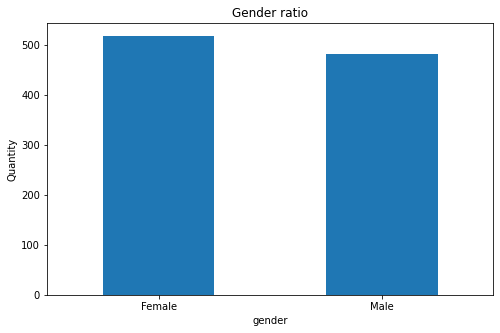

In [ ]:
col = 'gender'
ratio = students[col].value_counts()
xticks = ratio.index.str.title().to_list()
xticks_list = [index for index, value in enumerate(students[col].value_counts().index)]
ratio.plot(kind = 'bar', figsize = (8, 5))
plt.title(f'{col.title()} ratio', fontsize = 12)
plt.xlabel(col)
plt.ylabel('Quantity')
plt.xticks(xticks_list, xticks, rotation = 0)
plt.show()

Agora podemos criar uma funçao para encapsular o código anterior, de forma que apliquemos este plot para outras colunas.

In [ ]:
def show_proportion(col, rotation = 0):
    ratio = students[col].value_counts()
    xticks = ratio.index.str.title().to_list()
    xticks_list = [index for index, value in enumerate(students[col].value_counts().index)]
    ratio.plot(kind = 'bar', figsize = (8, 5))
    plt.title(f'{col.title()} ratio', fontsize = 12)
    plt.xlabel(col)
    plt.ylabel('Quantity')
    plt.xticks(xticks_list, xticks, rotation = rotation)
    plt.show()
    

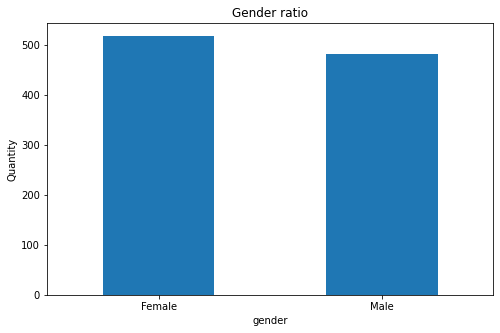

In [ ]:
# executa a função
show_proportion('gender')

In [ ]:
(students['parental level of education'].value_counts(normalize = True)\
.sort_values(ascending = False)*100).round(2)

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

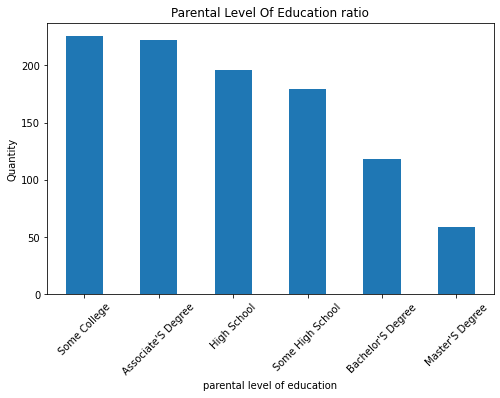

In [ ]:
show_proportion('parental level of education', rotation = 45)

Podemos mapear as informações por gênero:

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


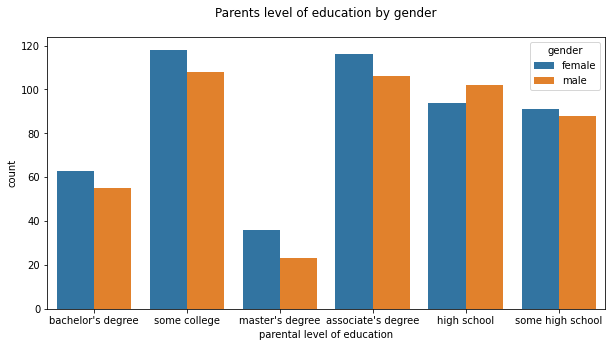

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(
    data = students, 
    x = 'parental level of education',
    hue = 'gender'
)
plt.title('Parents level of education by gender', pad = 20);

In [ ]:
students.describe()

,math score,reading score,writing score,mean
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


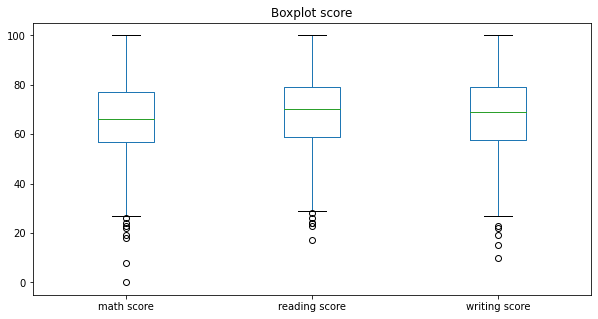

In [ ]:
students[provas].plot(kind = 'box', figsize = (10,5))
plt.title('Boxplot score');

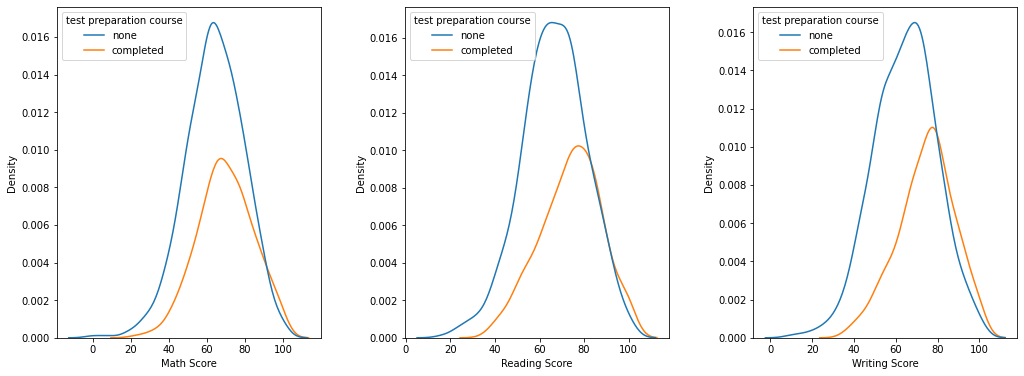

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (15,6))

sns.kdeplot(data = students, x = 'math score', hue = 'test preparation course', ax = ax0)
ax0.set_xlabel('Math Score')

sns.kdeplot(data = students, x = 'reading score', hue = 'test preparation course', ax = ax1)
ax1.set_xlabel('Reading Score')

sns.kdeplot(data = students, x = 'writing score', hue = 'test preparation course', ax = ax2)
ax2.set_xlabel('Writing Score')

plt.tight_layout(pad = 3.5)

Vamos fazer de outra forma o mesmo plot (mais escalável):

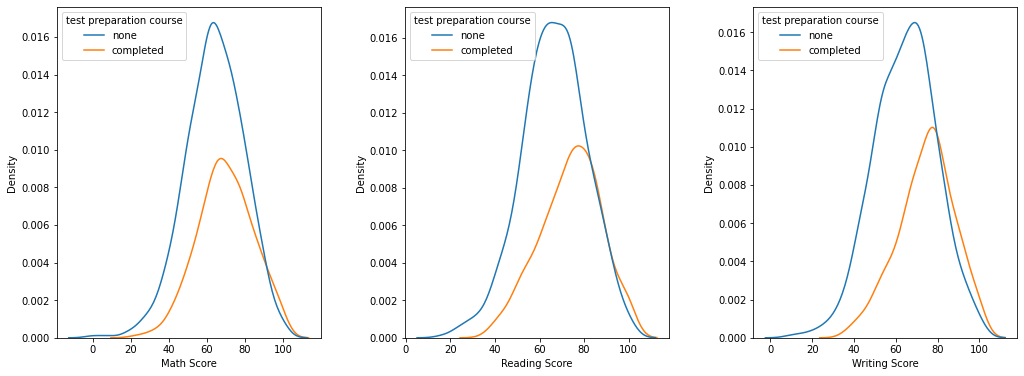

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))
hue_col = 'test preparation course'
for index, prova in enumerate(provas, start = 0):
    sns.kdeplot(
        data = students,
        x = prova,
        hue = hue_col,
        ax = ax[index])
    ax[index].set_xlabel(prova.title())
    
plt.tight_layout(pad = 3.5)

Podemos então encapsular o código anterior em uma função:

In [ ]:
def plot_exams_by_hue(hue_col, data = students):
    fig, ax = plt.subplots(1, 3, figsize = (15, 6))
    for index, prova in enumerate(provas, start = 0):
        sns.kdeplot(
            data = students,
            x = prova,
            hue = hue_col,
            ax = ax[index])
        ax[index].set_xlabel(prova.title())

    plt.tight_layout(pad = 3.5)

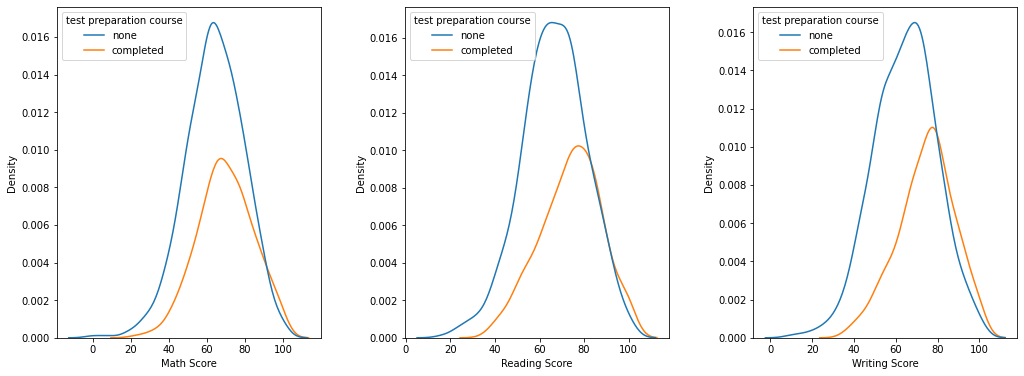

In [ ]:
plot_exams_by_hue('test preparation course')

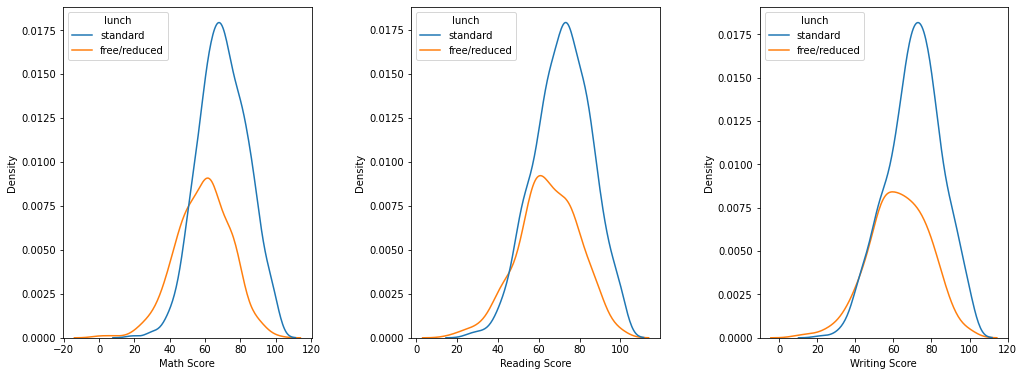

In [ ]:
plot_exams_by_hue('lunch')

Podemos então generalizar:

In [ ]:
categorical_values = students.select_dtypes(object).columns.to_list()

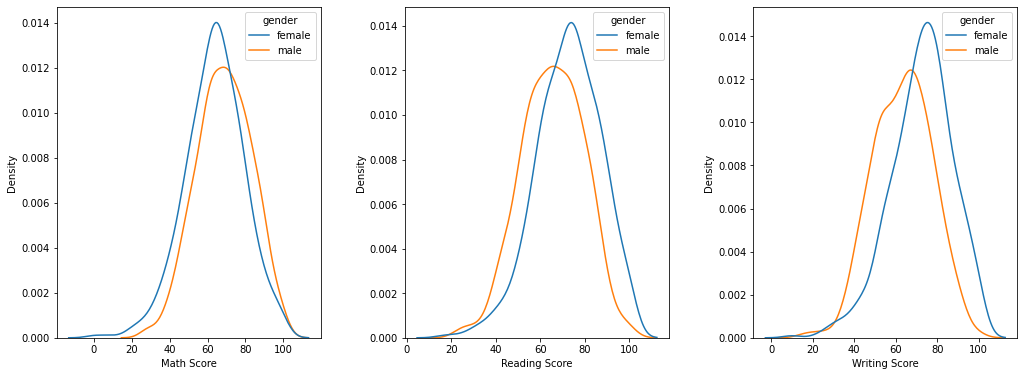

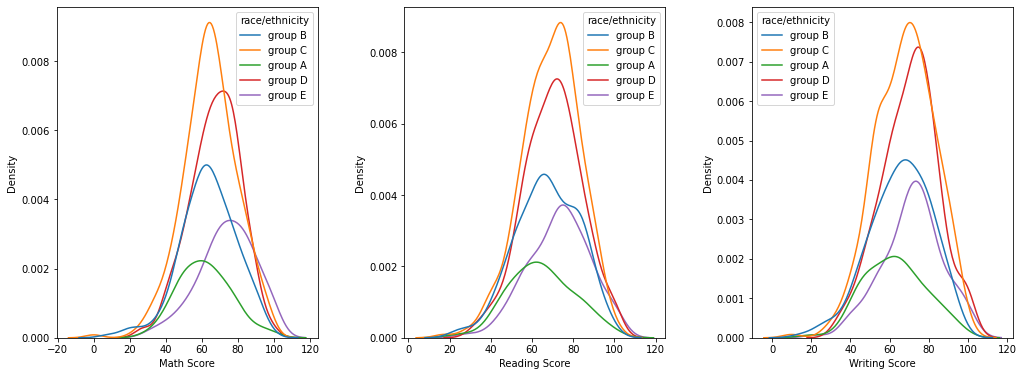

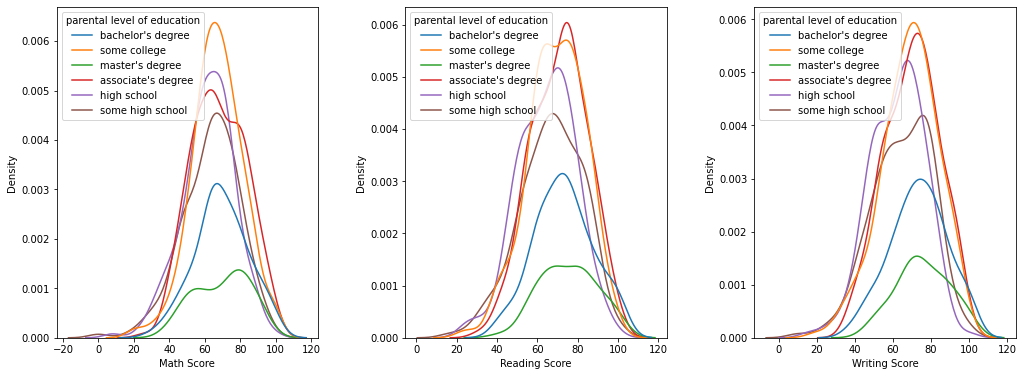

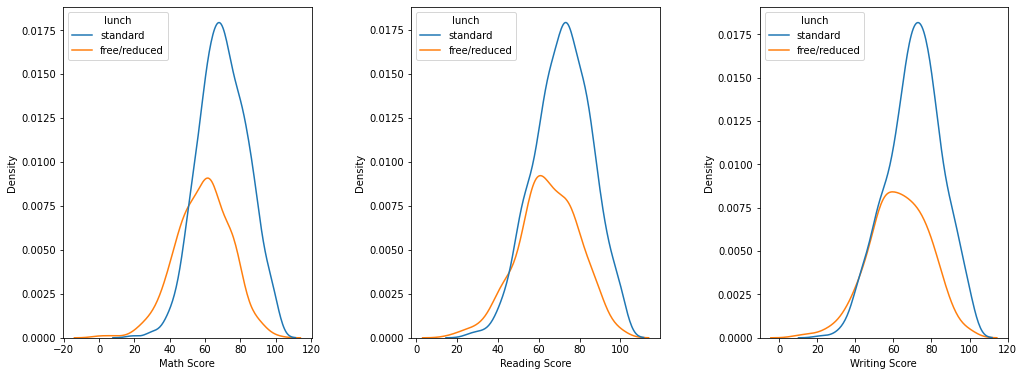

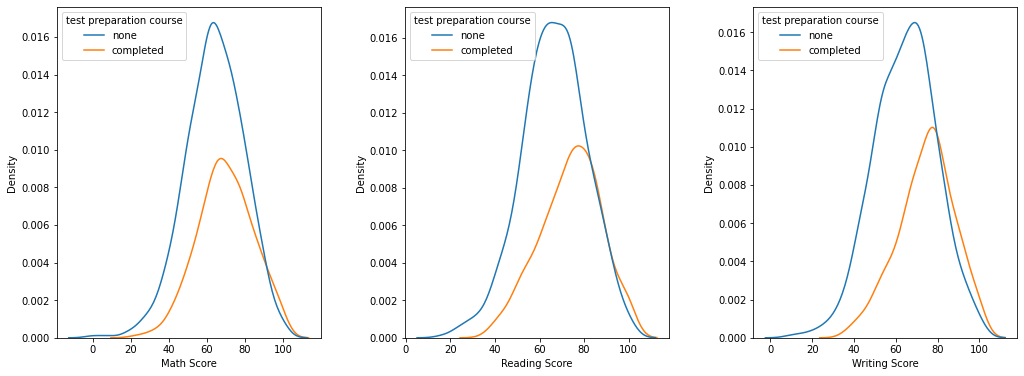

In [ ]:
for categorical in categorical_values:
    plot_exams_by_hue(categorical)

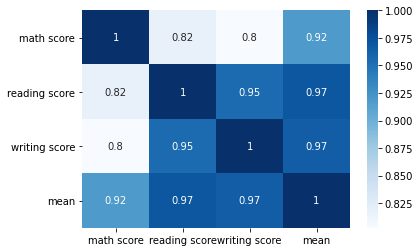

In [ ]:
sns.heatmap(students.corr(),
            annot = True,
            cmap = 'Blues'
           );

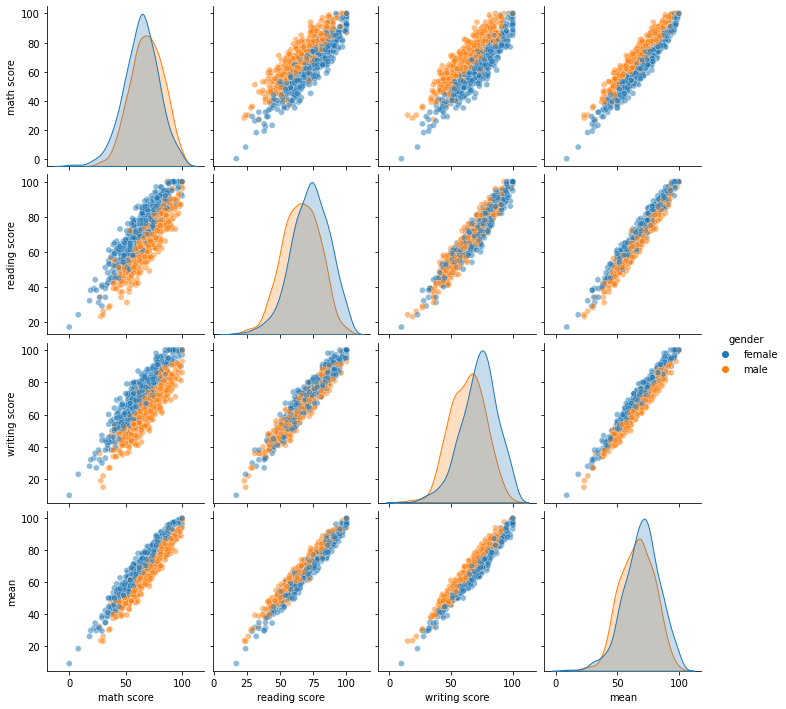

In [ ]:
sns.pairplot(students, hue = 'gender', plot_kws = {'alpha':0.5});

Vamos obter estatística descritivas de acordo com algumas variáveis categóricas do dataset.

In [ ]:
students.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67


In [ ]:
# média em matemática por gênero
students.groupby(by = 'gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

Vamos supor que, caso o aluno tenha pontuado acima de 70 pontos, tenha sido aprovado. Assim, vamos mapear os possíveis casos de forma agregada.

In [ ]:
# estatísticas descritivas de matemática por gênero
students.groupby(by = 'gender')['math score'].agg([min, np.mean, np.std, np.median, max])

,min,mean,std,median,max
gender,,,,,
female,0,63.633205,15.491453,65,100
male,27,68.728216,14.356277,69,100


In [ ]:
students.groupby('gender')[provas].agg(np.mean)

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Agora vamos agrupar por gênero e lunch (tipo de refeição do aluno).

In [ ]:
metrics = [np.mean, np.std, np.median, min, max]

In [ ]:
students.groupby(by = ['gender', 'lunch'])[provas].agg(metrics).T

gender                     female                     male            
lunch                free/reduced    standard free/reduced    standard
math score    mean      55.814815   68.124620    62.457831   72.022152
              std       15.481375   13.617588    14.012809   13.425969
              median    57.000000   67.000000    62.000000   72.000000
              min        0.000000   19.000000    27.000000   30.000000
              max       93.000000  100.000000   100.000000  100.000000
reading score mean      67.386243   75.607903    61.542169   67.537975
              std       15.333666   12.897866    13.777717   13.584135
              median    67.000000   75.000000    61.000000   67.500000
              min       17.000000   29.000000    23.000000   26.000000
              max      100.000000  100.000000   100.000000  100.000000
writing score mean      66.444444   75.927052    59.126506   65.509494
              std       16.041281   12.920990    13.754193   13.820501
              median    68.000000   76.000000    59.000000   67.000000
              min       10.000000   30.000000    15.000000   22.000000
              max      100.000000  100.000000    93.000000  100.000000

In [ ]:
students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean'],
      dtype='object')

In [ ]:
students.groupby('parental level of education')[provas].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Façamos um agrupamento por raça/etnia e grau de instrução familiar:

In [ ]:
(students.groupby(['race/ethnicity', 'parental level of education'])
 [provas]).agg(np.mean).T

race/ethnicity                         group A                                \
parental level of education associate's degree bachelor's degree high school   
math score                           61.000000         67.166667   60.444444   
reading score                        67.071429         68.083333   62.888889   
writing score                        63.571429         68.333333   60.500000   

race/ethnicity                                                             \
parental level of education master's degree some college some high school   
math score                        57.666667    63.888889        58.916667   
reading score                     64.666667    65.777778        62.083333   
writing score                     67.666667    65.000000        58.583333   

race/ethnicity                         group B                                \
parental level of education associate's degree bachelor's degree high school   
math score                           66.097561             69.30   59.791667   
reading score                        69.585366             72.95   63.458333   
writing score                        68.243902             71.65   61.250000   

race/ethnicity                               ...     group D                  \
parental level of education master's degree  ... high school master's degree   
math score                        67.166667  ...   62.863636       72.521739   
reading score                     80.166667  ...   64.409091       77.173913   
writing score                     77.166667  ...   63.159091       79.739130   

race/ethnicity                                                       group E  \
parental level of education some college some high school associate's degree   
math score                     68.731343            66.76          74.897436   
reading score                  70.880597            69.98          73.820513   
writing score                  71.701493            69.10          73.205128   

race/ethnicity                                                             \
parental level of education bachelor's degree high school master's degree   
math score                          76.555556   70.772727          74.625   
reading score                       74.833333   70.318182          82.125   
writing score                       75.388889   67.545455          80.500   

race/ethnicity                                             
parental level of education some college some high school  
math score                     73.828571        72.111111  
reading score                  72.628571        69.555556  
writing score                  70.200000        66.555556  

[3 rows x 30 columns]

### Próximos capítulos

Na próxima aula iremos trabalhar com microdados do ENEM, de modo que iremos aprender na prática processos como Limpeza de Dados, Análise Exploratória e Visualização Estatística. Aprenderemos ainda joins, missing data e outras tratativas.

Aula 2:
* Cleaning Data
* Reshape
* Hierarchical Index
* Merge
* Case: Microdados ENEM
    * DataViz: Matplotlib e Seaborn
    * Análise Exploratória e Estatística
    * Clustering

Aula 3:
* Visualização de dados na prática com Plotly (international trade data)
* Time Series e modelos estatísticos da família Box-Jenkins

### Materiais adicionais e referências
* https://datascience.quantecon.org/pandas/index.html
* https://www.kaggle.com/abdullahsahin/step-by-step-pandas-tutorial-for-beginner
* https://www.kaggle.com/kralmachine/pandas-tutorial-for-beginners
* https://www.kaggle.com/prashant111/comprehensive-data-analysis-with-pandas
* https://www.w3schools.com/python/pandas/default.asp
* https://www.geeksforgeeks.org/pandas-tutorial/
* https://jakevdp.github.io/PythonDataScienceHandbook/